In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
totaldataset = pd.read_csv("data.csv")

In [49]:
import random
# Original dataset has 92,000 rows and 1025 cols
# selection 30000 rows at random for testing for now
a=random.sample(range(0,92000), 40000)
dataset=totaldataset.loc[a]

In [50]:
dataset.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
86037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_7
72786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_0
18596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
28192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_15_adna
79624,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_3


In [51]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [52]:
num_pixels = X.shape[1]
# 46 characters, consonants "ka" to "gya", and the digits 0 to 9
num_classes = 46
img_width = 32
img_height = 32
img_depth = 1

In [53]:
X_images = X.values.reshape(X.shape[0],img_width,img_height)

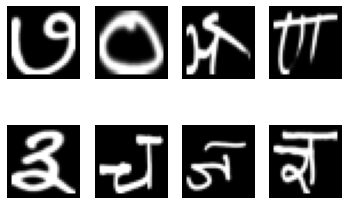

In [54]:
for i in range(1,9):
    plt.subplot(240+i)
    plt.axis('off')
    plt.imshow(X_images[i-1],cmap=plt.get_cmap('gray'))
plt.show()

In [55]:
dataset.iloc[:,1024].value_counts()

character_15_adna            917
character_34_chhya           912
character_16_tabala          911
character_19_dha             911
character_25_ma              904
digit_2                      903
digit_4                      901
character_13_daa             899
character_31_petchiryakha    898
character_30_motosaw         893
character_08_ja              892
digit_1                      892
character_14_dhaa            890
character_36_gya             889
character_29_waw             889
character_10_yna             882
digit_5                      879
digit_9                      877
character_23_ba              875
digit_3                      873
character_21_pa              870
character_17_tha             868
character_26_yaw             867
character_18_da              867
character_06_cha             867
character_28_la              864
character_24_bha             864
character_11_taamatar        864
character_05_kna             862
digit_6                      861
character_

In [56]:
# output in binary format
from sklearn.preprocessing import LabelBinarizer
binecoder = LabelBinarizer()
Y = binecoder.fit_transform(y)

In [57]:
# data normalization
X = X/255

In [58]:
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)

In [59]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model

In [60]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels,
                    input_dim=num_pixels,
                    kernel_initializer='normal',
                    activation='relu'                       
                   ))
    model.add(Dense(num_classes,
                   kernel_initializer='normal',
                   activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    return model

In [61]:
model = baseline_model()

In [62]:
epochs = 25
batch_size = 50
history = model.fit(X_train.values, y_train, validation_split=0.20, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/25
512/512 - 2s - loss: 1.2265 - accuracy: 0.6720 - val_loss: 0.7618 - val_accuracy: 0.7941
Epoch 2/25
512/512 - 2s - loss: 0.5037 - accuracy: 0.8607 - val_loss: 0.5275 - val_accuracy: 0.8500
Epoch 3/25
512/512 - 2s - loss: 0.2886 - accuracy: 0.9205 - val_loss: 0.4527 - val_accuracy: 0.8700
Epoch 4/25
512/512 - 2s - loss: 0.1719 - accuracy: 0.9532 - val_loss: 0.3992 - val_accuracy: 0.8898
Epoch 5/25
512/512 - 2s - loss: 0.0988 - accuracy: 0.9751 - val_loss: 0.4065 - val_accuracy: 0.8842
Epoch 6/25
512/512 - 2s - loss: 0.0646 - accuracy: 0.9843 - val_loss: 0.3806 - val_accuracy: 0.8969
Epoch 7/25
512/512 - 2s - loss: 0.0438 - accuracy: 0.9899 - val_loss: 0.4122 - val_accuracy: 0.8925
Epoch 8/25
512/512 - 2s - loss: 0.0483 - accuracy: 0.9868 - val_loss: 0.4631 - val_accuracy: 0.8842
Epoch 9/25
512/512 - 2s - loss: 0.0464 - accuracy: 0.9870 - val_loss: 0.4346 - val_accuracy: 0.8916
Epoch 10/25
512/512 - 2s - loss: 0.0408 - accuracy: 0.9882 - val_loss: 0.4365 - val_accuracy: 0.8942

In [63]:
scores = model.evaluate(X_test.values, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 90.66%


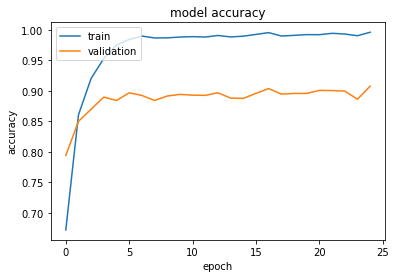

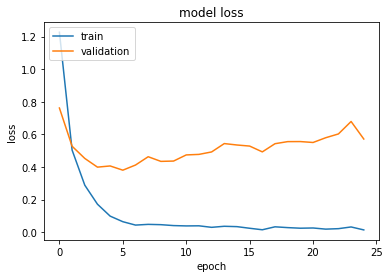

In [66]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='upper left')
plt.show()